# **cleaning data**



# Import Libraries and Load Cleaned Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cleaned dataset from the pickle file
df = pd.read_csv('heart.csv')

print("Cleaned dataset loaded successfully.")
df.head()

Cleaned dataset loaded successfully.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Prepare Data for Modeling

In [3]:
# Separate features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been split and scaled. Ready for training.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data has been split and scaled. Ready for training.
Training set shape: (734, 15)
Testing set shape: (184, 15)


# Initialize and Train the Models

In [4]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} has been trained.")


Logistic Regression has been trained.
Decision Tree has been trained.
Random Forest has been trained.
Support Vector Machine has been trained.


#  Make Predictions and Evaluate Metrics

In [5]:
# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = [accuracy, precision, recall, f1]
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")


--- Logistic Regression ---
Accuracy: 0.8859
Precision: 0.8716
Recall: 0.9314
F1-Score: 0.9005

--- Decision Tree ---
Accuracy: 0.7880
Precision: 0.7890
Recall: 0.8431
F1-Score: 0.8152

--- Random Forest ---
Accuracy: 0.8696
Precision: 0.8750
Recall: 0.8922
F1-Score: 0.8835

--- Support Vector Machine ---
Accuracy: 0.9022
Precision: 0.8818
Recall: 0.9510
F1-Score: 0.9151



# Compare Model Performance

In [6]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T

# Display the comparison table
print("Model Performance Comparison:")
results_df


Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.885870,0.871560,0.931373,0.900474
Decision Tree,0.788043,0.788991,0.843137,0.815166
Random Forest,0.869565,0.875000,0.892157,0.883495
Support Vector Machine,0.902174,0.881818,0.950980,0.915094


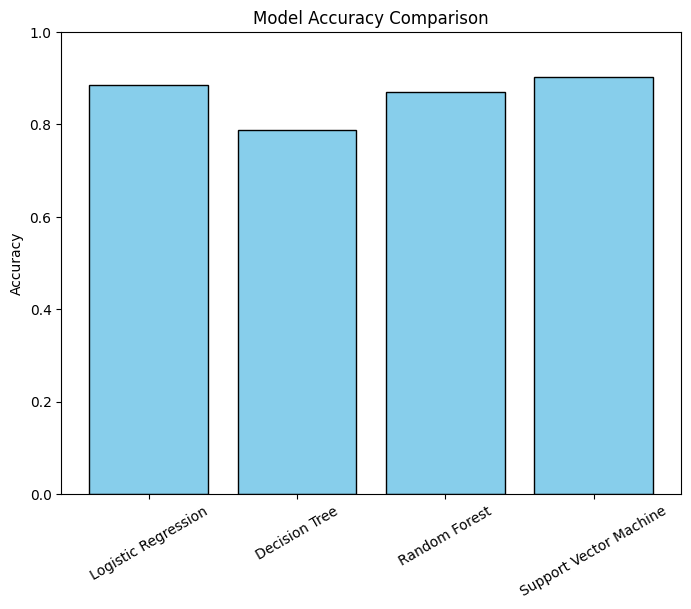

In [7]:
import matplotlib.pyplot as plt

# Extract accuracy values for plotting
accuracy_values = [metrics[0] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(8,6))
plt.bar(model_names, accuracy_values, color="skyblue", edgecolor="black")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()